In [1]:
import os, sys
import pickle

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from get_forecasting_model import *

Using: cpu


In [2]:
# df = pd.read_csv(os.path.join(project_root, 'data', 'processed', f"train.csv"))

df = pd.read_csv('D:/Study/Education/Projects/DataFlow/DataFlow_2026/data/processed/test.csv')

In [6]:
df.head(2)

,ip,identd,user,time,request,status,size,resource,protocol,utc,status_label
0,199.72.81.55,-,-,1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245.0,/history/apollo/,HTTP/1.0,UTC - 04,Success
1,unicomp6.unicomp.net,-,-,1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985.0,/shuttle/countdown/,HTTP/1.0,UTC - 04,Success


### Test Input shape

In [6]:
predictor = Predictor('de-rvfl', '5min', 12)

X, y = predictor.get_prediction(df)

X.shape

(2580, 72)

In [3]:
predictor = Predictor('xgboost', '5min', 12)

X, y = predictor.get_prediction(df)

X.shape

(2592, 28)

In [7]:
predictor = Predictor('lstm', '5min', 12)

X, y = predictor.get_prediction(df)

X.shape

(2580, 12, 6)

### Go on

In [26]:
X.shape

(852, 72)

In [9]:
predictor = Predictor('rvfl', '15min')

X, y, y_pred = predictor.get_prediction(df)

y_pred

Using: cpu


array([15.35901289, 15.48882702, 15.73455759, 15.62382399, 15.47198978,
       15.46980547, 15.14699074, 15.15806878, 15.09298796, 15.15375153,
       15.30384211, 15.69155594, 15.55037077, 15.59823138, 15.71066061,
       15.77582971, 15.85942895, 15.7251248 , 15.87398182, 15.97987019,
       16.13107794, 16.1737077 , 16.14437224, 16.14069656, 16.35802382,
       16.29567108, 16.28370217, 16.1961965 , 16.37594447, 16.02525469,
       16.02294238, 16.1244222 , 16.09893894, 16.36919492, 16.14053592,
       16.59905421, 16.19185646, 16.50904926, 16.6603745 , 16.57943752,
       16.54307731, 16.54029829, 16.54937705, 16.60929394, 16.51388174,
       16.67254545, 16.38792388, 16.65167549, 16.55934823, 16.49369353,
       16.35350735, 16.57695328, 16.82146363, 16.8048804 , 16.8181169 ,
       16.75385605, 16.34264103, 16.17879249, 16.44997965, 16.29345762,
       16.05186173, 16.28289851, 16.23294787, 16.44622174, 16.18611957,
       15.8852096 , 15.95712338, 16.09105275, 16.07325206, 16.07

In [10]:
y_pred = np.exp(y_pred)
y_true = np.exp(y)

# y_true = y

r2 = r2_score(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.7499
RMSE: 2855178.4099
MAE: 2136951.1856
MAPE: 0.2624


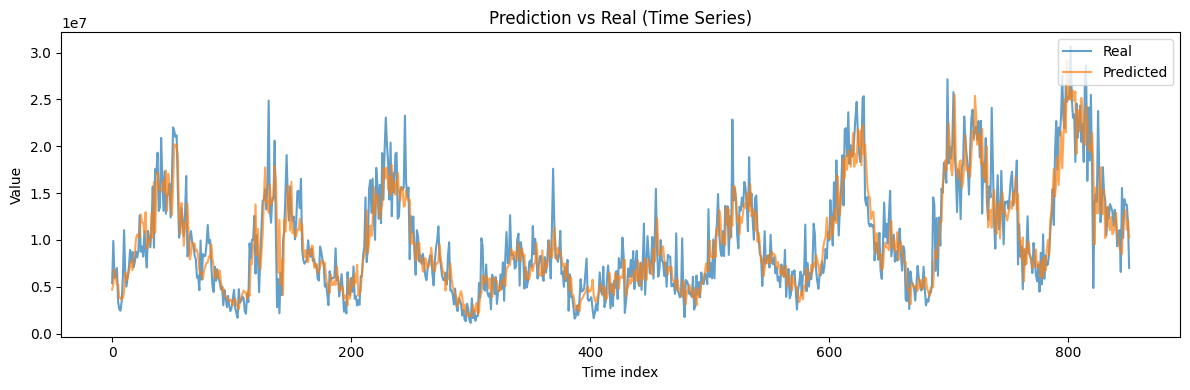

In [11]:
t = range(len(y))

plt.figure(figsize=(12, 4))
plt.plot(t, y_true, label="Real", alpha=0.7)
plt.plot(t, y_pred, label="Predicted", alpha=0.7)

plt.title("Prediction vs Real (Time Series)")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()